In [164]:

import heapq
from pathlib import Path
from math import inf, sqrt
from matplotlib import pyplot as plt

def build_path(came_from, current):
    final_path = [current]
    while current is not None:
        current = came_from[current]
        final_path.append(current)
    return final_path[-2::-1]


def a_star(map, start, goal):
    """
    Find a path between start and goal

    Keyword arguments:

    - start -- The start cell
    - goal -- The destination cell
    """

    def dist(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def heuristic(x): 
        return dist(x, goal)
        return sqrt( pow(x[0] - goal[0], 2) + pow(x[1] - goal[1], 2) )

    def adjacent(cell) -> "list[tuple]":
        adjacents = []
        for dx, dy in ( (1, 0), (-1, 0),  (0, -1), (0, 1) ):
            neighbor = (cell[0] + dx, cell[1] + dy)
            try:
                if map[neighbor[0]][neighbor[1]] == ' ':
                    adjacents.append((neighbor))
            except:
                pass
        return adjacents

    BIG_INT = 999999
    iteration = 0
    in_set = []
    evaluated = []
    open_set = []
    heapq.heappush(open_set, (0.0 , start))
    in_set.append(start)
    came_from = dict()
    came_from[start] = None
    g_score = dict()
    g_score[start] = 0
    f_score = dict()
    f_score[start] = heuristic(start)

    while len(open_set) != 0:
        
        print(f"{iteration} : {' '.join([f'({p:.2f}, {c})' for p, c in open_set ])}, ", end='')
        p, current = heapq.heappop(open_set)
        evaluated.append(current)
        print(f"popped: {current}, priority: {p}")

        if current == goal:
            for key in came_from:
                print(f"{key} -> {came_from[key]}")
            return build_path(came_from, current), evaluated, in_set

        for neighbor in adjacent(current):
            tentative_gscore = g_score.get(current) + dist(current, neighbor)

            if tentative_gscore < g_score.get(neighbor, inf):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_gscore
                f_score[neighbor] = tentative_gscore + heuristic(neighbor)
                if neighbor not in open_set:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
                    in_set.append(neighbor)

        iteration += 1
    raise Exception('Set is empty, cannot arrive to the specified cell')

def plot(map, points, evaluated, heap):
    from matplotlib.table import Table
    ncols = len(map)
    nrows = len(map[0])

    fig, ax = plt.subplots()
    ax.set_axis_off()

    tb = Table(ax, bbox=[0, 0, 1, 1])

    width, height = 1.0 / ncols, 1.0 / nrows

    for x in range(ncols):
        for y in range(nrows):
            if map[x][y] == '#':
                color = 'black'
            elif (x, y) in points:
                color = 'green'
            elif (x, y) in evaluated:
                color = 'royalblue'
            elif (x, y) in heap:
                color = 'yellow' 
            else:
                color = 'white'
            try:
                text = evaluated.index((x, y))
            except:
                text = ''
            tb.add_cell(nrows - y - 1, x, width, height, text=text, loc='center', facecolor=color)

    for i in range(ncols):
        tb.add_cell(nrows, i, width, height, text=str(i), loc='center',
                    edgecolor='none', facecolor='none')

    for i in range(nrows):
        tb.add_cell(nrows - 1 - i, -1, width, height, text=str(i), loc='center',
                    edgecolor='none', facecolor='none')

    ax.add_table(tb)
    try:
        plt.show()
    except:
        plt.savefig(Path(__file__).parent/'path.png')


In [165]:

map = [                                        # x
    ['#', '#', '#', '#', '#', '#', '#', '#'],  # 0
    ['#', ' ', '#', ' ', ' ', ' ', ' ', '#'],  # 1
    ['#', ' ', ' ', '#', ' ', ' ', ' ', '#'],  # 2
    ['#', ' ', ' ', ' ', '#', ' ', ' ', '#'],  # 3
    ['#', ' ', ' ', ' ', ' ', '#', ' ', '#'],  # 4
    ['#', ' ', ' ', ' ', ' ', ' ', ' ', '#'],  # 5
    ['#', ' ', ' ', ' ', ' ', ' ', ' ', '#'],  # 6
    ['#', '#', '#', '#', '#', '#', '#', '#'],  # 7
]
# y   0    1    2    3    4    5    6    7


start = (6, 1)
goal = (1, 6)


In [166]:
path, evaluated, in_set = a_star(map, start, goal)

0 : (0.00, (6, 1)), popped: (6, 1), priority: 0.0
1 : (10.00, (5, 1)) (10.00, (6, 2)), popped: (5, 1), priority: 10
2 : (10.00, (4, 1)) (10.00, (6, 2)) (10.00, (5, 2)), popped: (4, 1), priority: 10
3 : (10.00, (3, 1)) (10.00, (4, 2)) (10.00, (5, 2)) (10.00, (6, 2)), popped: (3, 1), priority: 10
4 : (10.00, (2, 1)) (10.00, (3, 2)) (10.00, (5, 2)) (10.00, (6, 2)) (10.00, (4, 2)), popped: (2, 1), priority: 10
5 : (10.00, (1, 1)) (10.00, (3, 2)) (10.00, (2, 2)) (10.00, (6, 2)) (10.00, (4, 2)) (10.00, (5, 2)), popped: (1, 1), priority: 10
6 : (10.00, (2, 2)) (10.00, (3, 2)) (10.00, (5, 2)) (10.00, (6, 2)) (10.00, (4, 2)), popped: (2, 2), priority: 10
7 : (10.00, (3, 2)) (10.00, (4, 2)) (10.00, (5, 2)) (10.00, (6, 2)), popped: (3, 2), priority: 10
8 : (10.00, (3, 3)) (10.00, (4, 2)) (10.00, (5, 2)) (10.00, (6, 2)), popped: (3, 3), priority: 10
9 : (10.00, (4, 2)) (10.00, (6, 2)) (10.00, (5, 2)) (12.00, (4, 3)), popped: (4, 2), priority: 10
10 : (10.00, (4, 3)) (10.00, (5, 2)) (12.00, (4, 3))

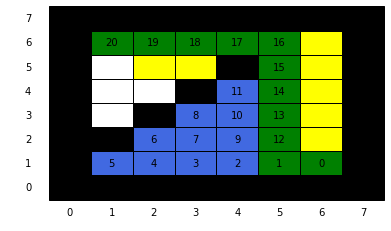

In [167]:
plot(map, path, evaluated, in_set)